In [1]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os

In [2]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

In [3]:
rose='u-cy368'
ANCILLARY_DIR= HOME / 'cylc-run' / rose / 'share/data/ancils/aus2200'

In [4]:
# Resolution directoryes

ERA_DIR = ANCILLARY_DIR / 'era5/'
D0198_DIR = ANCILLARY_DIR / 'd0198/'

In [5]:
# We need to import ants to read in UM file formats
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [6]:
# Plot the land sea mask and fractions files
MASK_FILE_ERA = ERA_DIR / 'qrparm.mask'
MASK_FILE_D0198 = D0198_DIR / 'qrparm.mask'

In [7]:
mask_cube_era = ants.load(MASK_FILE_ERA)
mask_cube_d0198 = ants.load(MASK_FILE_D0198)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [8]:
mask_cube_era

[<iris 'Cube' of land_area_fraction / (1) (latitude: 100; longitude: 100)>,
<iris 'Cube' of land_binary_mask / (1) (latitude: 100; longitude: 100)>]

In [9]:
mask_cube_d0198

[<iris 'Cube' of land_area_fraction / (1) (latitude: 200; longitude: 200)>,
<iris 'Cube' of land_binary_mask / (1) (latitude: 200; longitude: 200)>]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


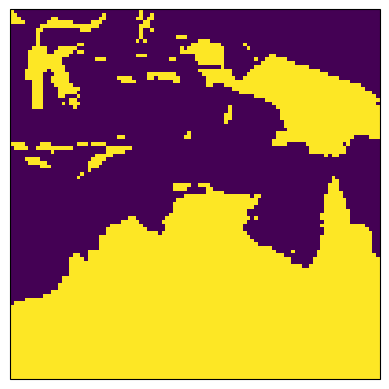

In [10]:
iris.plot.pcolormesh(mask_cube_era[1])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


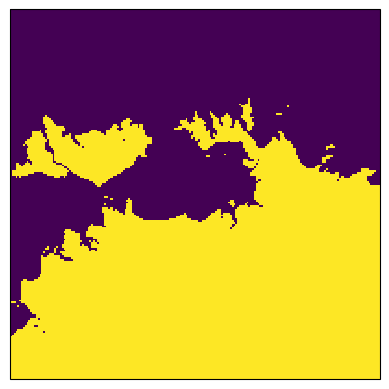

In [11]:
iris.plot.pcolormesh(mask_cube_d0198[1])

In [12]:
# Convert these masks to data arrays
laf_era = xr.DataArray.from_iris(mask_cube_era[0])
lbm_era = xr.DataArray.from_iris(mask_cube_era[1])

laf_d0198 = xr.DataArray.from_iris(mask_cube_d0198[0])
lbm_d0198 = xr.DataArray.from_iris(mask_cube_d0198[1])

# Load orography
ERA_OROG_FILE = ERA_DIR / 'qrparm.orog.mn'
D0198_OROG_FILE = D0198_DIR / 'qrparm.orog.mn'

era_orog_cube = ants.load(ERA_OROG_FILE)
d0198_orog_cube = ants.load(D0198_OROG_FILE)

orog_era = xr.DataArray.from_iris(era_orog_cube[0])
orog_d0198 = xr.DataArray.from_iris(d0198_orog_cube[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


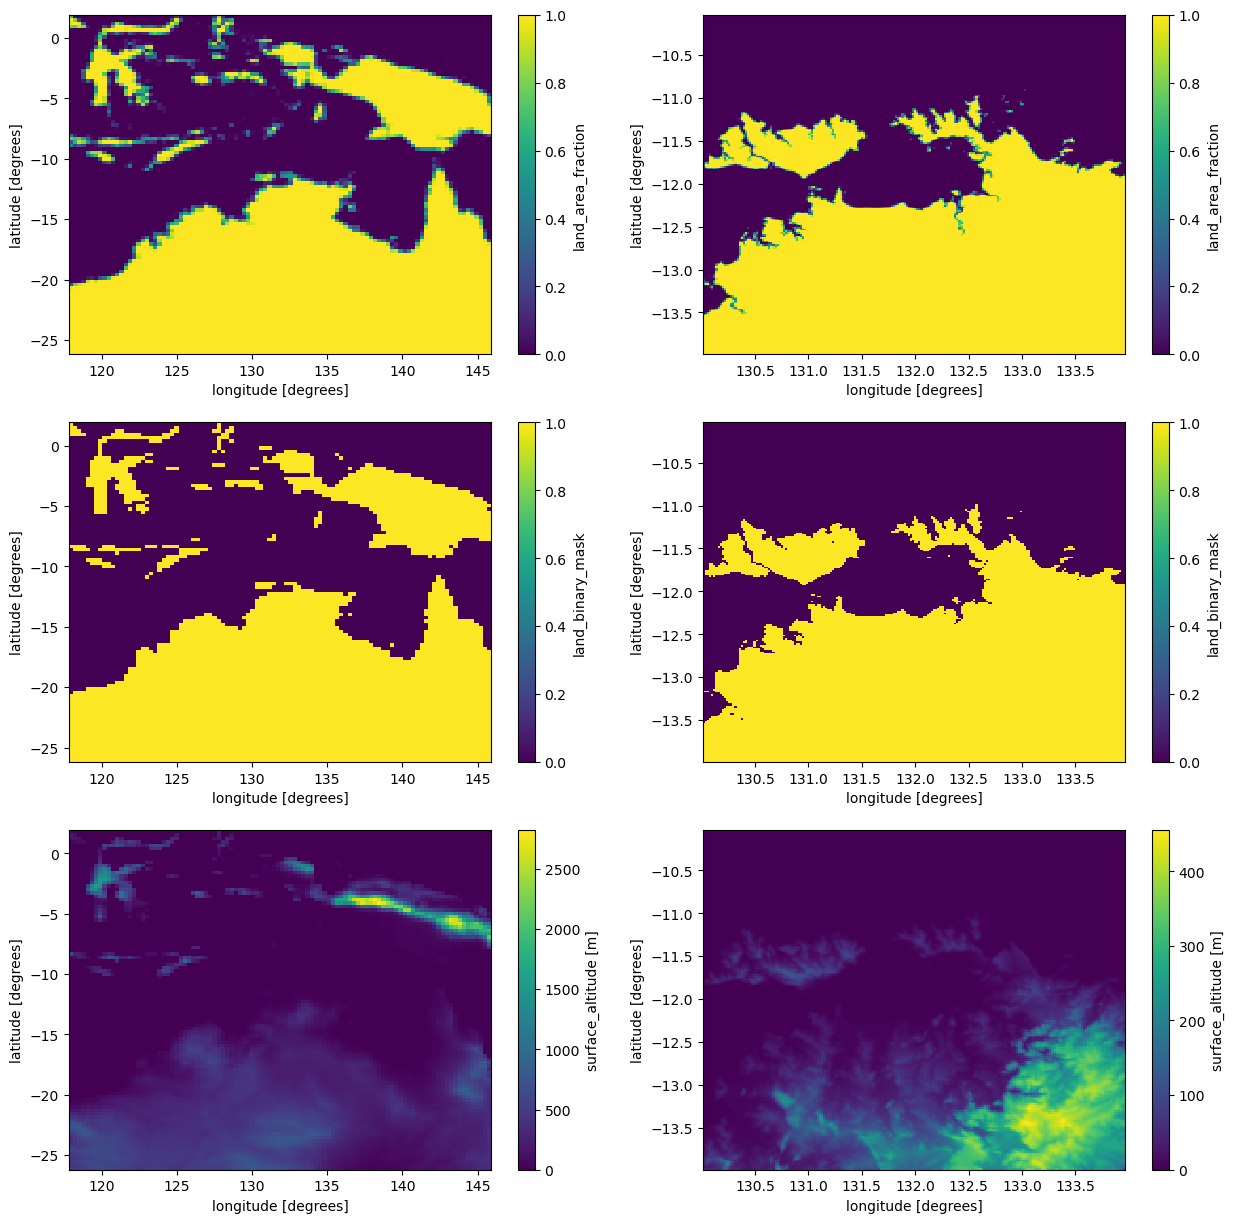

In [13]:
fig,ax=plt.subplots(3,2,figsize=(15,15))#,subplot_kw={'projection':ccrs.PlateCarree()})

laf_era.plot(ax=ax[0,0])
lbm_era.plot(ax=ax[1,0])
orog_era.plot(ax=ax[2,0])

laf_d0198.plot(ax=ax[0,1])
lbm_d0198.plot(ax=ax[1,1])
orog_d0198.plot(ax=ax[2,1])


#axes_pretty(ax.flatten())

In [50]:
# Quick logic to check all ancil files.
files = list(ERA_DIR.glob('qrparm*'))

In [59]:
# Get total list of fields
num_plots = 0
for file in files:
    #print (f'INFO : Loading {file}')
    try:
        cube = ants.load(file)
        #print (cube)
        num_plots = num_plots+len(cube)
    except:
        print (f'ERROR : Unable to open {file}\nERROR : You will have to manually check this file using "xconv" ')
        continue

ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/era5/qrparm.veg.dist
ERROR : You will have to manually check this file using "xconv" 


In [60]:
num_plots

64

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/era5/qrparm.veg.dist


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

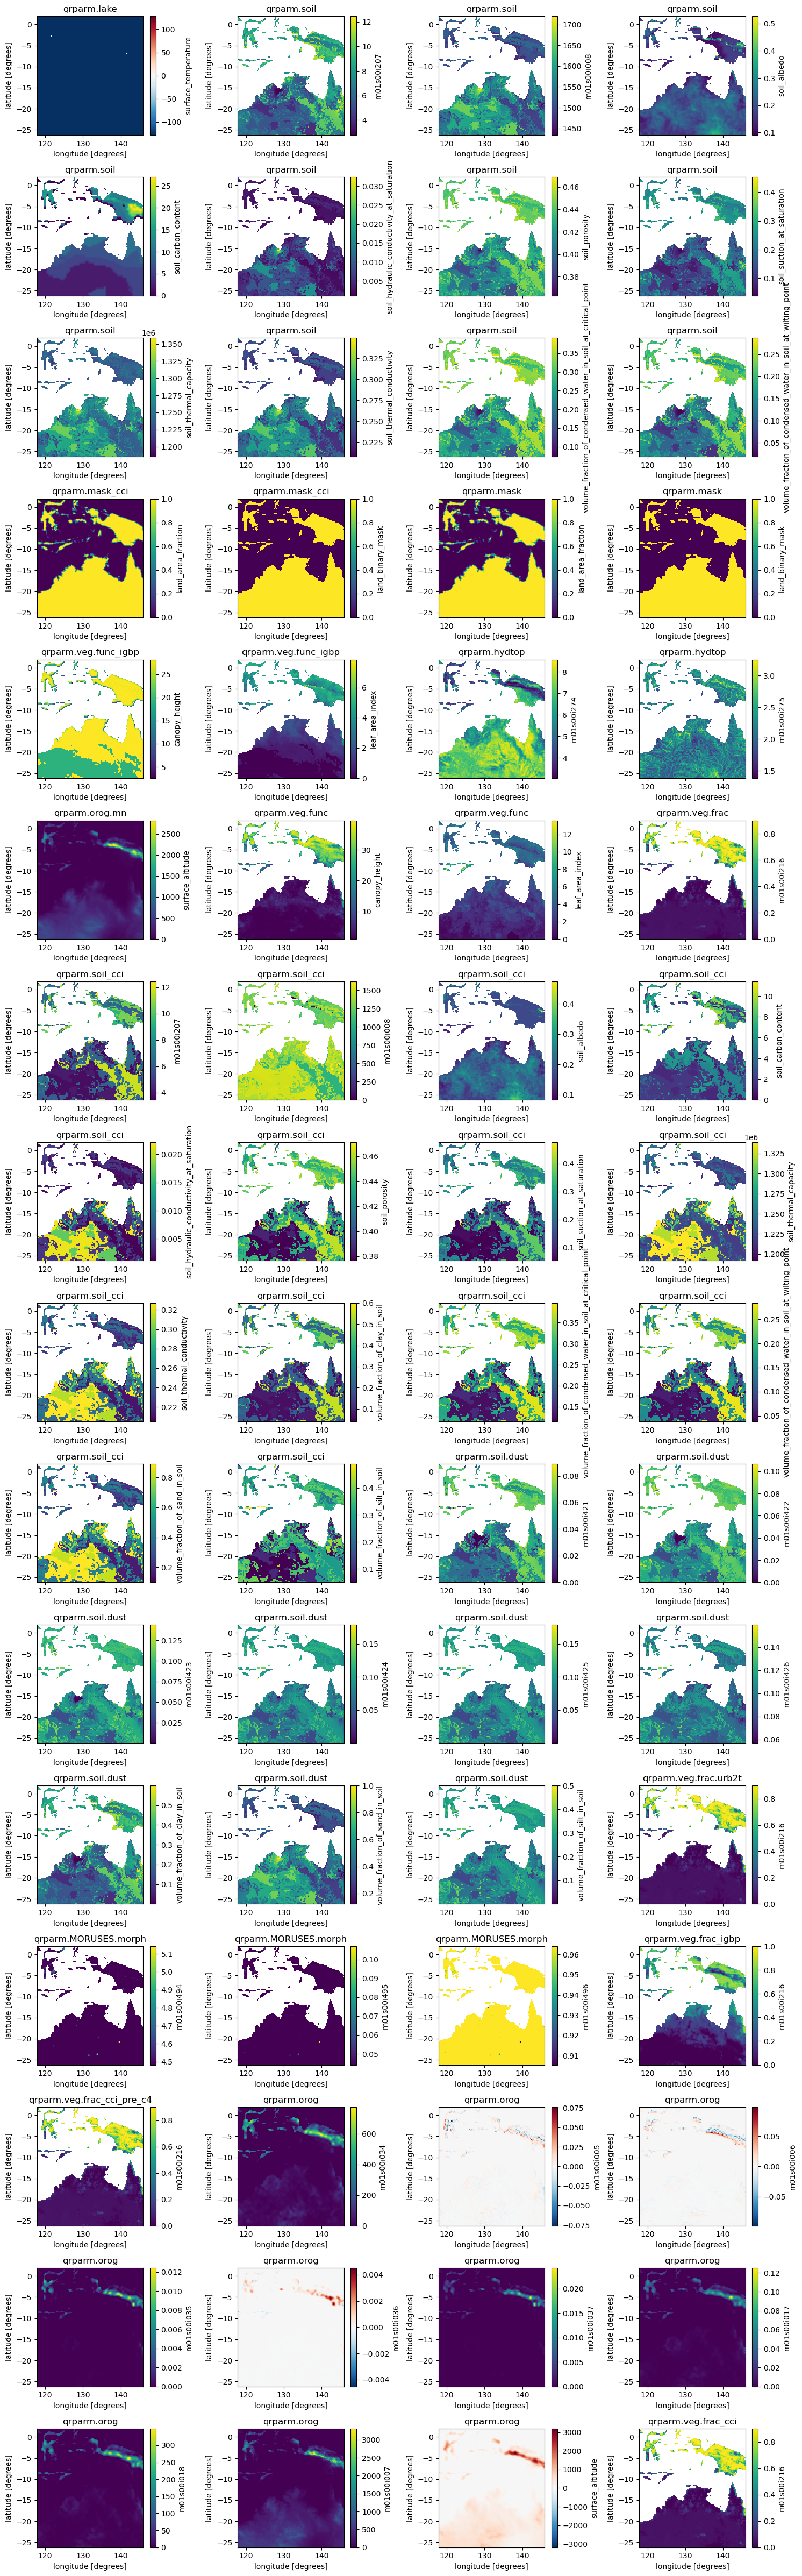

In [129]:
num_columns=4
num_rows = num_plots // num_columns

if num_plots % num_columns != 0:
    num_rows += 1

Position = range(1,num_plots+1)

fig_height = num_rows*3
fig_width = 15

fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            cb_args = {'label':da.attrs['standard_name']}
        else:
            cb_args = {'label':da.attrs['STASH']}
        if len(da.dims) > 2: 
            # Need to reduce dimension
            if len(da.dims) == 3:
                da = da[0]
            elif len(da.dims) == 4:
                da = da[0,0]

        da.plot(ax=ax,cbar_kwargs=cb_args)
        ax.set_title(file.name)
        k += 1
plt.tight_layout()

In [130]:
# Repeat for higher-resolution domain
files = list(D0198_DIR.glob('qrparm*'))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

ERROR : Unable to open /home/548/pag548/cylc-run/u-cy368/share/data/ancils/aus2200/d0198/qrparm.veg.dist


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

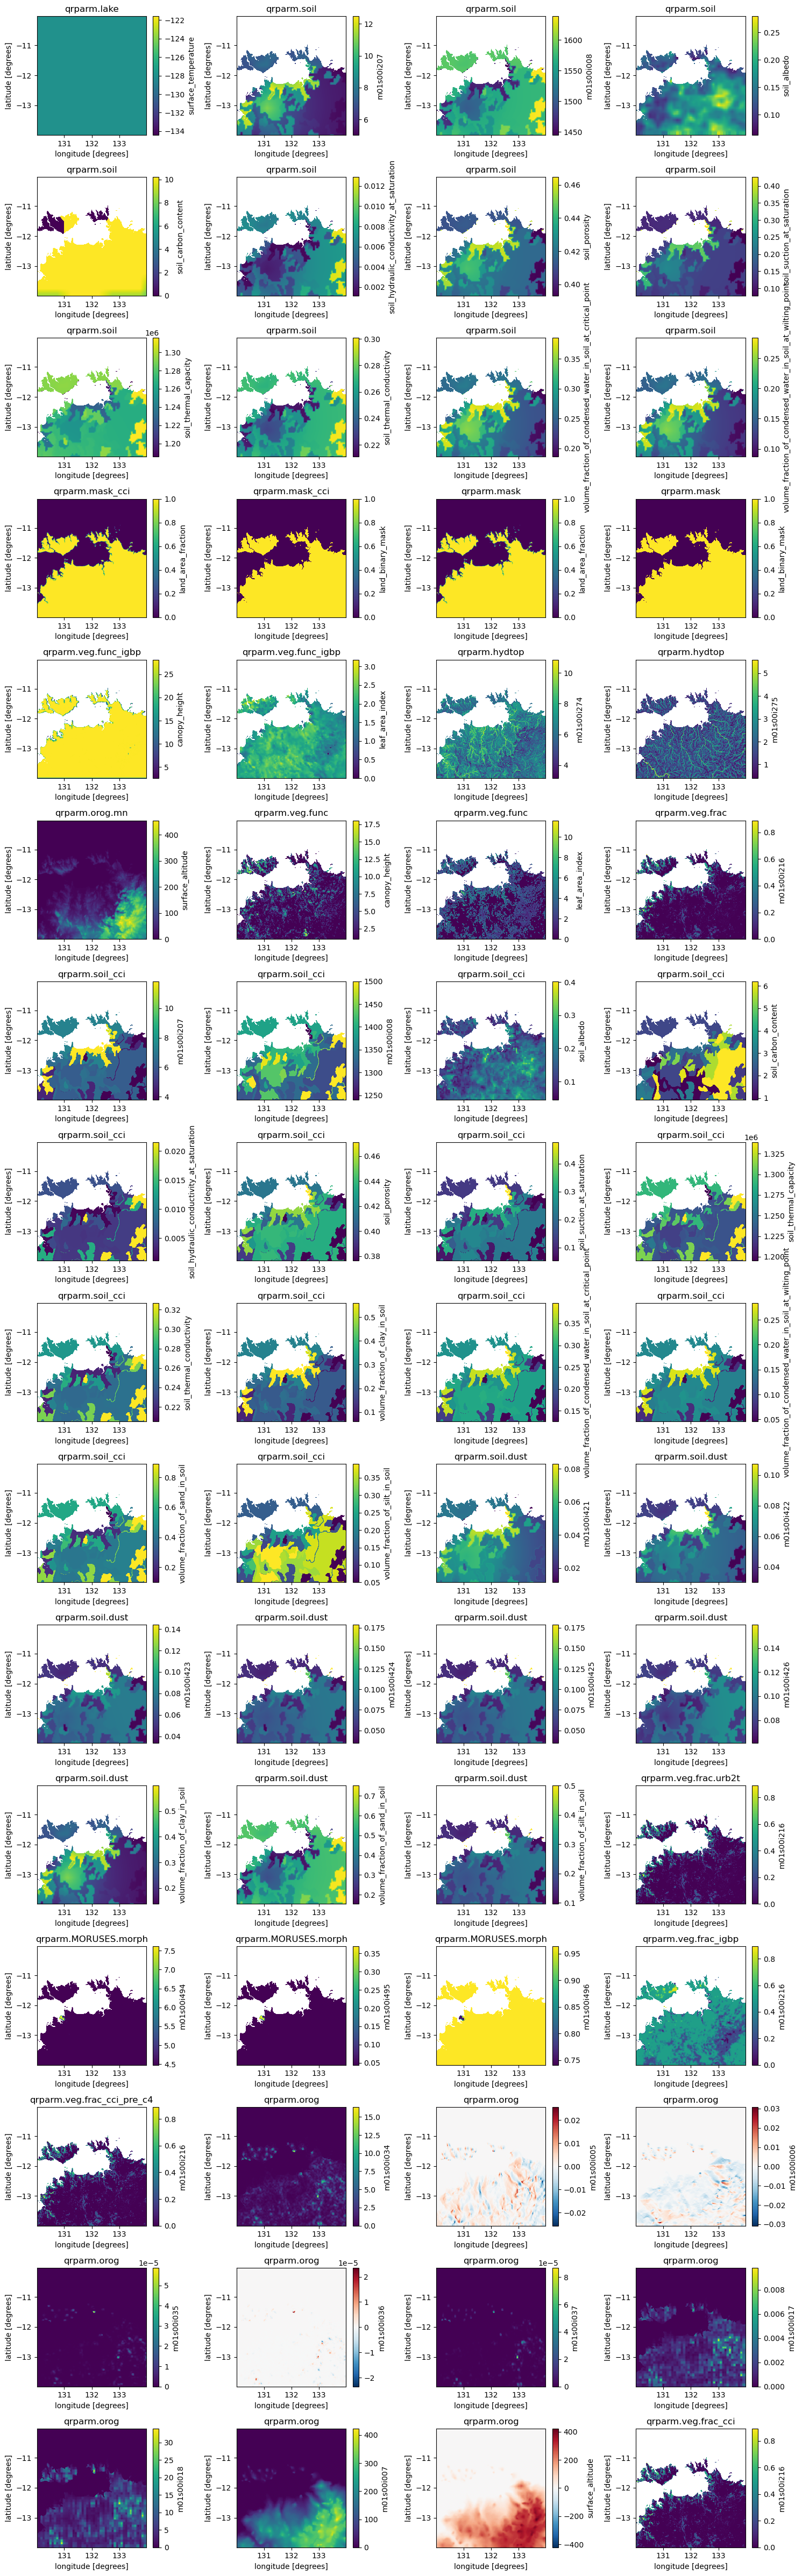

In [132]:
fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            cb_args = {'label':da.attrs['standard_name']}
        else:
            cb_args = {'label':da.attrs['STASH']}
        if len(da.dims) > 2: 
            # Need to reduce dimension
            if len(da.dims) == 3:
                da = da[0]
            elif len(da.dims) == 4:
                da = da[0,0]

        da.plot(ax=ax,cbar_kwargs=cb_args)
        ax.set_title(file.name)
        k += 1
plt.tight_layout()

In [ ]:
file